<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#KE-Immunization-Coverage-By-County" data-toc-modified-id="KE-Immunization-Coverage-By-County-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>KE Immunization Coverage By County</a></span><ul class="toc-item"><li><span><a href="#Summary-Stats" data-toc-modified-id="Summary-Stats-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Summary Stats</a></span></li><li><span><a href="#By-2011-Quintiles" data-toc-modified-id="By-2011-Quintiles-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>By 2011 Quintiles</a></span></li><li><span><a href="#Explore-Relationships" data-toc-modified-id="Explore-Relationships-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Explore Relationships</a></span></li></ul></li></ul></div>

In [30]:
## load libz and configurations 
%run "../../Utilz/load_envz.ipynb"

In [31]:
## load dataset 
dataset = pd.read_csv( "%s/KNBS_et_al/county-full-immunization-coverage-rate-for-children-under-one-year-2011-to-2013.csv" % DATA_DIR )  

# KE Immunization Coverage By County

What's in the data
- Multiple years 
- % coverage of immunization by county 


In [36]:
# explore data << TODO: glimpse equiv 

print( "1. Shape")
dataset.shape

print("\n2. Dtypes")
dataset.dtypes

print("\n3. Missing values")
checkMissing(dataset)

1. Shape


(47, 4)


2. Dtypes


County     object
2011      float64
2012      float64
2013      float64
dtype: object


3. Missing values


('\nShape # records, # variables',
 (47, 4),
 '\n\n\n Counts of Missing Values \n',
 County    0
 2011      0
 2012      0
 2013      0
 dtype: int64)


4. Outliers using 2011 as baseline


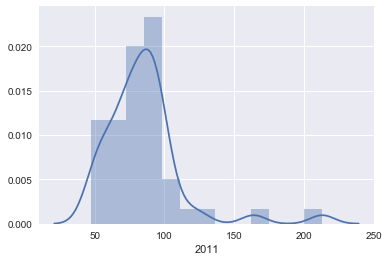

In [54]:
## distribution by 2011 baseline
print("\n4. Outliers using 2011 as baseline")
sns.distplot( dataset["2011"])



5. Replacing values > 1 with group mean of non-outliers


2011    76.671554
2012    79.704257
2013    72.471436
dtype: float64

,County,2011,2012,2013,Quints_2011
3,Busia,125.397188,170.444758,117.095901,Quint_5
6,Garissa,213.074499,124.099330,129.735053,Quint_5
7,Homabay,100.207160,88.578212,80.482947,Quint_5
17,Kitui,114.050349,70.818274,72.173310,Quint_5
26,Migori,102.681254,83.091222,80.869055,Quint_5


,County,2011,2012,2013,Quints_2011
3,Busia,125.397188,170.444758,117.095901,Quint_5
6,Garissa,213.074499,124.099330,129.735053,Quint_5
7,Homabay,100.207160,88.578212,80.482947,Quint_5
17,Kitui,114.050349,70.818274,72.173310,Quint_5
26,Migori,102.681254,83.091222,80.869055,Quint_5



5. Updated


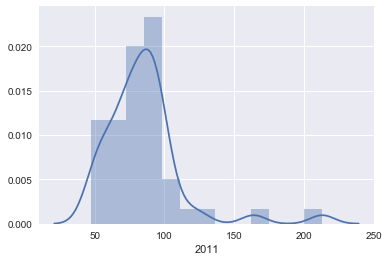

In [71]:
print("\n\n5. Replacing values > 1 with group mean of non-outliers")
dataset[ dataset["2011"] <= 100 ].mean()

dataset[ dataset["2011"] > 100 ].head()

dataset["2011"].replace( dataset["2011"] > 100, dataset[ dataset["2011"] <= 100 ]["2011"].mean(), inplace=True)
dataset["2012"].replace( dataset["2012"] > 100, dataset[ dataset["2012"] <= 100 ]["2012"].mean(), inplace=True)
dataset["2013"].replace( dataset["2013"] > 100, dataset[ dataset["2013"] <= 100 ]["2013"].mean(), inplace=True)

dataset[ dataset["2011"] > 100 ].head()


## distribution by 2011 baseline
print("\n5. Updated")
sns.distplot( dataset["2011"])

## Summary Stats
    - Latest average country coverage is {{ np.round(dataset["2013"].mean()) }} % in 2013
    
    - Average coverage has been declining over the years from {{ np.round(dataset["2011"].mean() )}} % in 2011, to {{np.round(dataset["2012"].mean() )}} % in 2012 and then {{np.round(dataset["2013"].mean() )}} % in 2013

In [37]:
print("Summarize By Year")
summarizer( dataset)

Summarize By Year


,2011,2012,2013
count,47.00,47.00,47.00
mean,84.82,83.61,76.90
std,28.56,19.76,18.58
min,47.19,42.02,48.44
25%,70.38,72.62,65.38
50%,83.62,82.79,76.65
75%,94.29,89.56,83.50
max,213.07,170.44,139.62


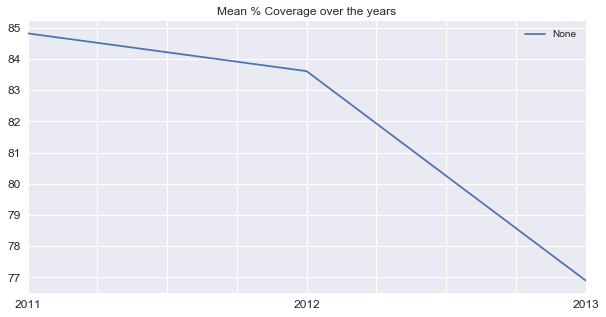

In [44]:
dataset.mean().plot(kind='line', title ="Mean % Coverage over the years", figsize=(10, 5), legend=True, fontsize=12)

## By 2011 Quintiles



In [72]:
## Quintile the counties by coverage at 2011 baseline
quintilize(dataset, "2011")
dataset.groupby("Quints_2011").agg([np.count_nonzero, np.mean]).round(1)


2011                 2012                2013      
            count_nonzero   mean count_nonzero  mean count_nonzero  mean
Quints_2011                                                             
Quint_1              10.0   55.3          10.0  66.8          10.0  60.5
Quint_2               9.0   72.3           9.0  78.8           9.0  74.4
Quint_3               9.0   83.0           9.0  83.5           9.0  74.3
Quint_4               9.0   91.7           9.0  90.4           9.0  80.0
Quint_5              10.0  121.0          10.0  98.7          10.0  95.2

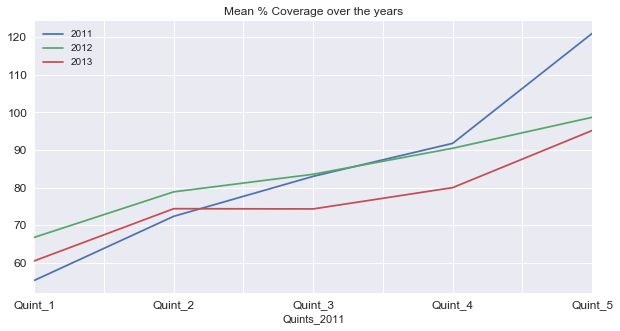

In [73]:
dataset.groupby("Quints_2011").mean().plot(kind='line', title ="Mean % Coverage over the years", figsize=(10, 5), legend=True, fontsize=12)

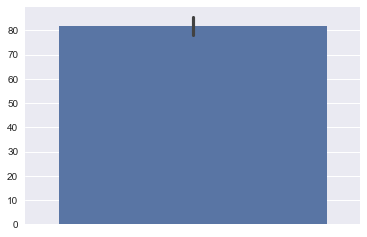

In [88]:
sns.barplot( y=["2011", "2012", "2013"], hue="Quints_2011", data=dataset)

#from ggplot import * 
#ggplot(df, aes(x='x', weight='w', fill='cat')) + geom_bar() + theme_bw()

In [98]:
## Flatten the data structure
dataset.query( "County == 'Baringo'").head()
dataset_2 = pd.merge( pd.melt( dataset, id_vars="County", value_vars=["2011", "2012", "2013"], var_name="Year", value_name="Pct_Coverage"), 
                     dataset[["County", "Quints_2011"]], on="County") 

dataset_2.head()

,County,2011,2012,2013,Quints_2011
0,Baringo,62.119093,69.877673,64.835414,Quint_1


,County,Year,Pct_Coverage,Quints_2011
0,Baringo,2011,62.119093,Quint_1
1,Baringo,2012,69.877673,Quint_1
2,Baringo,2013,64.835414,Quint_1
3,Bomet,2011,57.227700,Quint_1
4,Bomet,2012,42.022997,Quint_1


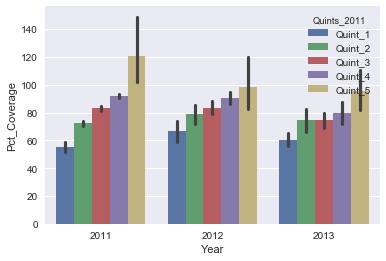

In [103]:
sns.barplot( x="Year", y="Pct_Coverage", hue="Quints_2011", data=dataset_2)

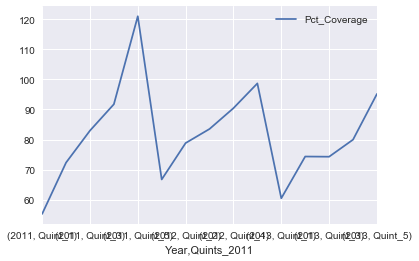

In [111]:
dataset_2.groupby(["Year","Quints_2011"]).mean().plot(kind="line")

In [108]:
#dataset_2.groupby(["Year"]).mean().plot(kind='line', title ="Mean % Coverage over the years", figsize=(10, 5), legend=True, fontsize=12)

## Explore Relationships